In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.applications import VGG19
from keras.applications import VGG16
from keras.applications import ResNet50V2
from keras.models import load_model

In [0]:
model = VGG19(weights='imagenet', 
                      include_top=False, 
                      input_shape=(32, 32, 3))

In [0]:
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model
import tensorflow as tf

for layer in model.layers[:-1]:
    layer.trainable = False

x = model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x) 
predictions = Dense(10, activation='softmax')(x) 
model = Model(inputs=model.input, outputs=predictions)

In [196]:
model.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0  

In [191]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(y_train[10])
train_y = np.zeros((50000,10), dtype="uint8")
print(train_y[2])
for sira, deger in enumerate(y_train):
    train_y[sira, deger] = 1

[4]
[0 0 0 0 0 0 0 0 0 0]


In [199]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["mse"])
history = model.fit(x_train, train_y, epochs=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 55s 1ms/step - loss: 1.6530 - mean_squared_error: 0.0628 - val_loss: 1.3691 - val_mean_squared_error: 0.0595
Epoch 2/2
40000/40000 [==============================] - 44s 1ms/step - loss: 1.1938 - mean_squared_error: 0.0538 - val_loss: 1.2989 - val_mean_squared_error: 0.0569


In [200]:
history.history

{'loss': [1.6529673573493957, 1.193790720796585],
 'mean_squared_error': [0.06282247767001391, 0.05376207108944654],
 'val_loss': [1.3691395616531372, 1.298870644760132],
 'val_mean_squared_error': [0.059547520923614504, 0.05691053605079651]}

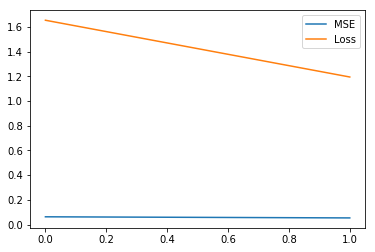

In [201]:
plt.plot(history.history["mean_squared_error"], label="MSE")
plt.plot(history.history["loss"], label="Loss")
plt.legend()
plt.show()